In [0]:
import keras

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [3]:
model = keras.models.load_model('/content/drive/My Drive/FCN_vx.h5')












Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [4]:
print(model.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
permute_2_input (InputLayer)    (None, 480, 480, 3)  0                                            
__________________________________________________________________________________________________
permute_2 (Permute)             (None, 480, 480, 3)  0           permute_2_input[0][0]            
__________________________________________________________________________________________________
conv1_1 (Conv2D)                (None, 480, 480, 64) 1792        permute_2[0][0]                  
__________________________________________________________________________________________________
conv1_2 (Conv2D)                (None, 480, 480, 64) 36928       conv1_1[0][0]                    
____________________________________________________________________________________________

In [5]:
!pip install gluoncv

     |████████████████████████████████| 512kB 3.5MB/s 


In [6]:
!pip install mxnet

     |████████████████████████████████| 25.4MB 2.0MB/s 
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [0]:
import time
import numpy as np
import mxnet as mx
from mxnet import gluon, autograd
from mxnet.gluon.data.vision import transforms
from gluoncv import data, utils, model_zoo
from gluoncv.utils.parallel import *
from gluoncv.loss import MixSoftmaxCrossEntropyLoss
from matplotlib import pyplot as plt

In [8]:
from google.colab import files
files.upload() 

Saving pascal_voc.py to pascal_voc.py


{'pascal_voc.py': b'"""Prepare PASCAL VOC datasets"""\nimport os\nimport shutil\nimport argparse\nimport tarfile\nfrom gluoncv.utils import download, makedirs\n\n_TARGET_DIR = os.path.expanduser(\'~/.mxnet/datasets/voc\')\n\n\ndef parse_args():\n    parser = argparse.ArgumentParser(\n        description=\'Initialize PASCAL VOC dataset.\',\n        epilog=\'Example: python pascal_voc.py --download-dir ~/VOCdevkit\',\n        formatter_class=argparse.ArgumentDefaultsHelpFormatter)\n    parser.add_argument(\'--download-dir\', type=str, default=\'~/VOCdevkit/\', help=\'dataset directory on disk\')\n    parser.add_argument(\'--no-download\', action=\'store_true\', help=\'disable automatic download if set\')\n    parser.add_argument(\'--overwrite\', action=\'store_true\', help=\'overwrite downloaded files if set, in case they are corrupted\')\n    args = parser.parse_args()\n    return args\n\n#####################################################################################\n# Download a

In [9]:
!python pascal_voc.py

100% 449250/449250 [00:38<00:00, 11749.27KB/s]
100% 440450/440450 [00:36<00:00, 12095.62KB/s]
100% 1952773/1952773 [02:35<00:00, 12559.57KB/s]
1386270KB [00:35, 39296.14KB/s]                 


In [10]:
# input_transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize([.485, .456, .406], [.229, .224, .225]),])
trainset = data.VOCSegmentation(split='train')
print('Training images:', len(trainset))

Training images: 2913


In [11]:
valset = data.VOCSegmentation(split='val')
print('Validation images:', len(valset))

Validation images: 1449


In [382]:
import random
no_smaple = random.randint(0, 2913)
print(no_smaple)

2357


In [383]:
print(trainset[no_smaple][0].shape)
temp = trainset[no_smaple][0].reshape((1,480,480,3))
print(temp.shape)

(480, 480, 3)
(1, 480, 480, 3)


In [384]:
y_hat_temp = model.predict(temp.asnumpy())
print(y_hat_temp.shape)

(1, 480, 480, 22)


In [385]:
i = np.argmax(y_hat_temp, axis=-1)
i = i.squeeze()
print(i.shape)
print(np.all(i == 0))

(480, 480)
False


In [386]:
import gluoncv
from PIL import Image
import numpy as np
from gluoncv import data, utils
from matplotlib import pyplot as plt

img, mask = trainset[no_smaple]
print(mask.shape)
# get pallete for the mask
from gluoncv.utils.viz import get_color_pallete
mask = i
mask = get_color_pallete(mask)
mask.save('mask.png')

(480, 480)


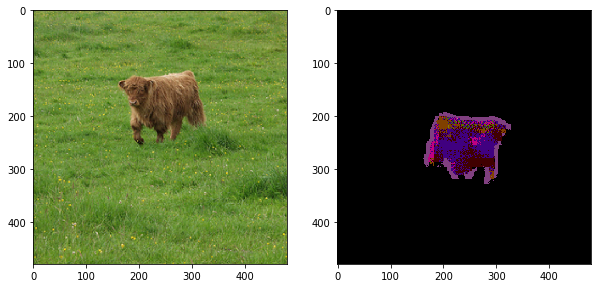

In [387]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
# subplot 1 for img
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,2,1)
plt.imshow(img.asnumpy().reshape(480, 480, 3).astype('uint8'))
# subplot 2 for the mask
mmask = mpimg.imread('mask.png')
fig.add_subplot(1,2,2)
plt.imshow(mmask)
# display
plt.show()